In [2]:
#Create a series with 10 elements containing both positive and negative integers
import pandas as pd

a = [1, 7, 2, -4, -99, -1, 13, 8, -9, -10]

mySeries = pd.Series(a)

print(mySeries)

0     1
1     7
2     2
3    -4
4   -99
5    -1
6    13
7     8
8    -9
9   -10
dtype: int64


In [3]:
# Examine the series with the head() method

mySeries.head(5)

0     1
1     7
2     2
3    -4
4   -99
dtype: int64

In [9]:
# Create a new series from the originally created series with only negative numbers
negativeSeries = mySeries.loc[lambda x : x < 0]
print("Negative values from mySeries ===>")
print(negativeSeries)

# Create the original series with both positive and negative numbers
copySeries = mySeries
print("Creating a copy of from mySeries ===>")
print(copySeries)

# Create a new series with only the negative numbers from the original series
negativeCopySeries = mySeries.loc[lambda x : x < 0]
print("Negative values from copySeries ===>")
print(negativeCopySeries)


Negative values from mySeries ===>
3    -4
4   -99
5    -1
8    -9
9   -10
dtype: int64
Creating a copy of from mySeries ===>
0     1
1     7
2     2
3    -4
4   -99
5    -1
6    13
7     8
8    -9
9   -10
dtype: int64
Negative values from copySeries ===>
3    -4
4   -99
5    -1
8    -9
9   -10
dtype: int64


In [4]:
# Press shift-enter to execute a Jupyter notebook cell
# Import the Python Libraries used in the tutorial
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

In [79]:
# Read a csv file into Pandas Dataframe
salaries = pd.read_csv('C:/Users/hp/Downloads/salaries.csv')

# Display the first 10 records
salaries.head(10)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300
8,Prof,A,29,19,Male,94350
9,Prof,A,51,51,Male,57800


# Exercise - Working with a single column

In [13]:
# Calculate the descriptive statistics for only the salary column in df_new
salaries = pd.read_csv('C:/Users/hp/Downloads/salaries.csv')
salaries[['salary']].describe()

,salary
count,78.000000
mean,108023.782051
std,28293.661022
min,57800.000000
25%,88612.500000
50%,104671.000000
75%,126774.750000
max,186960.000000


In [22]:
# Get a count for each of the values in the salary_k column in df_new
salary_count = salaries.groupby('salary').aggregate({'salary':'count'})
print(salary_count)

        salary
salary        
57800        1
62884        1
63100        1
71065        1
72500        2
...        ...
155750       1
155865       1
161101       1
162200       1
186960       1

[73 rows x 1 columns]


In [27]:
# Calculate the average (mean) salary_k in df_new
mean_salary = salaries[['salary']].mean()
print(mean_salary)

salary    108023.782051
dtype: float64


# Exercise - Grouping data

In [31]:
# Group data by the rank and discipline and find the average yearsOfService and salary_k for each group. 
grouped_data = salaries.groupby(['rank','discipline']).aggregate({'salary':'mean','service':'mean'})
print(grouped_data)

                             salary    service
rank      discipline                          
AssocProf A            73959.800000  15.800000
          B           102927.750000   8.500000
AsstProf  A            74450.000000   2.125000
          B            86390.272727   2.272727
Prof      A           111935.695652  20.434783
          B           135313.913043  22.391304


# Exercise - Filtering data

In [48]:
# Using filtering, find the mean value of the salary for the discipline A
disciplineA = salaries[salaries['discipline'] == 'A']
mean_salary = disciplineA['salary'].mean()
print(mean_salary)

98331.11111111111


In [65]:
# Challenge:
# Determine how many female and male professors earned more than 100K
print("=== Determine how many female and male professors earned more than 100K ===>")
salaries_more_than_100K = salaries[salaries['salary'] > 100000]
group_by_sex_salaries_more_than_100K = salaries_more_than_100K.groupby(['sex']).aggregate({'salary':'count'})
print(group_by_sex_salaries_more_than_100K)

# Filter for professors with salaries over 100K
print("\n\n=== Filter for professors with salaries over 100K ===>")
professors_over_100k = salaries_more_than_100K[salaries_more_than_100K['rank'] == 'Prof']
print(professors_over_100k)

# Group by gender and count the number of professors in each group
print("\n\n=== Group by gender and count the number of professors in each group ===>")
group_by_sex = salaries.groupby(['sex']).aggregate({'salary':'count'})
print(group_by_sex)

# Print the results


=== Determine how many female and male professors earned more than 100K ===>
        salary
sex           
Female      21
Male        25


=== Filter for professors with salaries over 100K ===>
    rank discipline  phd  service     sex  salary
0   Prof          B   56       49    Male  186960
2   Prof          A   23       20    Male  110515
3   Prof          A   40       31    Male  131205
4   Prof          B   20       18    Male  104800
5   Prof          A   20       20    Male  122400
7   Prof          A   18       18    Male  126300
10  Prof          B   39       33    Male  128250
11  Prof          B   23       23    Male  134778
13  Prof          B   35       33    Male  162200
14  Prof          B   25       19    Male  153750
15  Prof          B   17        3    Male  150480
18  Prof          A   19        7    Male  107300
19  Prof          A   29       27    Male  150500
21  Prof          A   33       30    Male  103106
26  Prof          A   38       19    Male  148750
27  Pr

# Exercise - Slicing a dataframe

In [62]:
#Create a new dataframe where you filter out salaries below 100K from df_new
salaries_below_100k = salaries[salaries['salary'] < 100000]
print(salaries_below_100k)

         rank discipline  phd  service     sex  salary
1        Prof          A   12        6    Male   93000
6   AssocProf          A   20       17    Male   81285
8        Prof          A   29       19    Male   94350
9        Prof          A   51       51    Male   57800
12   AsstProf          B    1        0    Male   88000
16   AsstProf          B    8        3    Male   75044
17   AsstProf          B    4        0    Male   92000
20   AsstProf          B    4        4    Male   92000
22   AsstProf          A    4        2    Male   73000
23   AsstProf          A    2        0    Male   85000
24       Prof          A   30       23    Male   91100
25       Prof          B   35       31    Male   99418
28   AsstProf          B    7        2    Male   91300
38   AsstProf          B    4        3    Male   91000
41  AssocProf          A   13        8  Female   74830
42   AsstProf          B    4        2  Female   80225
43   AsstProf          B    5        0  Female   77000
46   AsstP

In [77]:
# Extract rows 5:10 and columns ['service', 'salary'] of df_sub100 using the .loc method
filtered_rows = salaries_below_100k.loc[5:10].filter(items=['service','salary'])
print(filtered_rows)

   service  salary
6       17   81285
8       19   94350
9       51   57800


In [69]:
# Extract rows 5:10 and columns ['yearsOfService', 'salary_k'] from df_sub100 using the iloc method
filtered_rows_salaries_below_100k = salaries_below_100k.iloc[5:10].filter(items=['service','salary'])
print(filtered_rows_salaries_below_100k)

    service  salary
16        3   75044
17        0   92000
20        4   92000
22        2   73000
23        0   85000


In [73]:
# Extract rows with index values [6, 12, 20, 22] and columns ['yearsOfService','salary_k'] from df_sub100
filtered_exact_rows_salaries_below_100k = salaries_below_100k.iloc[[6, 12, 20, 22]].filter(items=['service','salary'])
print(filtered_exact_rows_salaries_below_100k)

    service  salary
17        0   92000
28        2   91300
54       22   62884
56        8   77500


# Exercise - Sorting

In [74]:
#Sort the data frame df_new by the salary (in descending order)
sorted_salary_desc = salaries.sort_values('salary')
print(sorted_salary_desc)

         rank discipline  phd  service     sex  salary
9        Prof          A   51       51    Male   57800
54  AssocProf          A   25       22  Female   62884
66   AsstProf          A    7        6  Female   63100
71  AssocProf          B   12        9  Female   71065
57   AsstProf          A    3        1  Female   72500
..        ...        ...  ...      ...     ...     ...
31       Prof          B   22       21    Male  155750
27       Prof          A   45       43    Male  155865
72       Prof          B   24       15  Female  161101
13       Prof          B   35       33    Male  162200
0        Prof          B   56       49    Male  186960

[78 rows x 6 columns]


In [78]:
#Display the first 10 records of the output
print(sorted_salary_desc.head(10))

         rank discipline  phd  service     sex  salary
9        Prof          A   51       51    Male   57800
54  AssocProf          A   25       22  Female   62884
66   AsstProf          A    7        6  Female   63100
71  AssocProf          B   12        9  Female   71065
57   AsstProf          A    3        1  Female   72500
55   AsstProf          A    2        0  Female   72500
22   AsstProf          A    4        2    Male   73000
64  AssocProf          A   26       24  Female   73300
53   AsstProf          A    5        3  Female   73500
46   AsstProf          B   11        3  Female   74692


# Missing Values

In [80]:
# Press shift-enter to execute a Jupyter notebook cell
# Import the Python Libraries used in the tutorial
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

flights = pd.read_csv('C:/Users/hp/Downloads/flights.csv')

# Enable inline plotting
%matplotlib inline

In [129]:
# Read a dataset with missing values


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


In [83]:
# Count how many missing pieces of data there are in the dep_delay and arr_delay columns
missing_count = flights.isna().sum().filter(items=['dep_delay','arr_delay'])
print(missing_count)

dep_delay    2336
arr_delay    2827
dtype: int64


dep_delay    2336
arr_delay    2827
dtype: int64

# Exercise 7 Graphing data

In [138]:
# Use the seaborn package to explore the dependency of arr_delay on dep_delay 
# in the flights dataset. You can use a scatterplot or regplot using flight.

In [139]:
# Show graphs within the Python notebook
%matplotlib inline

<AxesSubplot:xlabel='arr_delay', ylabel='dep_delay'>

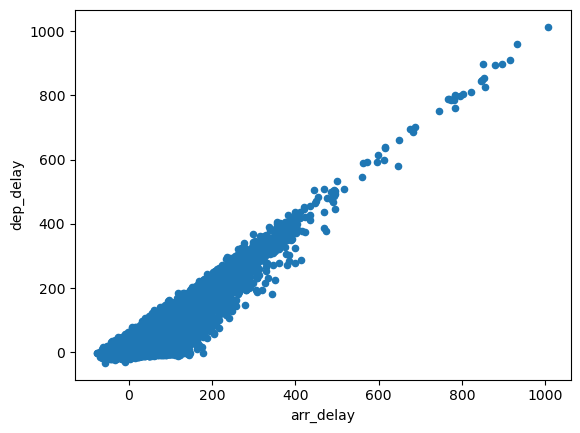

In [84]:
flights.plot.scatter(x='arr_delay',y='dep_delay')

Text(0.5, 1.0, 'arr_delay vs. dep_delay')

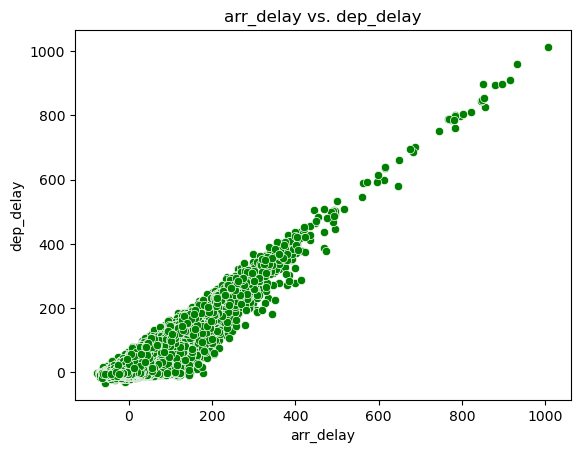